<h1>Movies Popularity Prediction</h1>
    
    - Part 1: Exploring data
    - Part 2: Preprocessing
    - Part 3: Neural Network
    - Part 4: SVM
    - Part 5: Random Forest
    - Part 6: Conclusion

<h2> Part 1: Exploring dara <h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from statistics import mean , stdev
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(0)

import seaborn as sns
sns.set()

movies = pd.read_csv('./dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('./dataset/tmdb_5000_credits.csv')

Let's take a look at the data

In [2]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We notice that the columns 'genres', 'keywords', 'production_companies', 'production_countries' and 'spoken_languages' are of the dictionary type (they have nominal values). 

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Also the credits dataset inclueds only attribute with nominal values.
Do the two dataset contain information for the same films? Let's check it.

In [4]:
(credits['title']==movies['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

This tells us that every row in the credits data base has the same movie title as the same row in the movies data base.

<h3> Numerical analysis </h3>

In [5]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movies_num = movies[num_list]
movies_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [6]:
movies_num.describe().round()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4.803000e+03,4801.0,4803.0,4803.0
mean,29045040.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,876.0,2.787965e+09,338.0,10.0,13752.0


Runtime includes some NaN value. We should solve this to work with data.

In [7]:
my_imputer = SimpleImputer()
X2 = my_imputer.fit_transform(movies[['runtime']])
movies_num['runtime'] = X2
movies_num.describe().round()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4.803000e+03,4803.0,4803.0,4803.0
mean,29045040.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,876.0,2.787965e+09,338.0,10.0,13752.0


The movies dataset contains also some meaningless feature as "id". We can remove it.

/home/emanuele/anaconda3/envs/IMDBPopularityPrediction/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecd7860da0>,
      dtype=object)

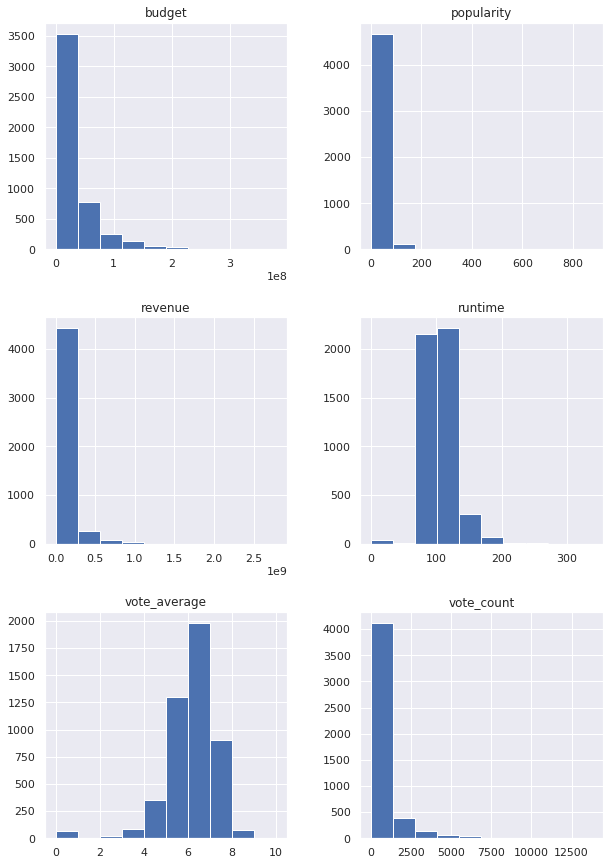

In [8]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
movies_num.hist(ax = ax)

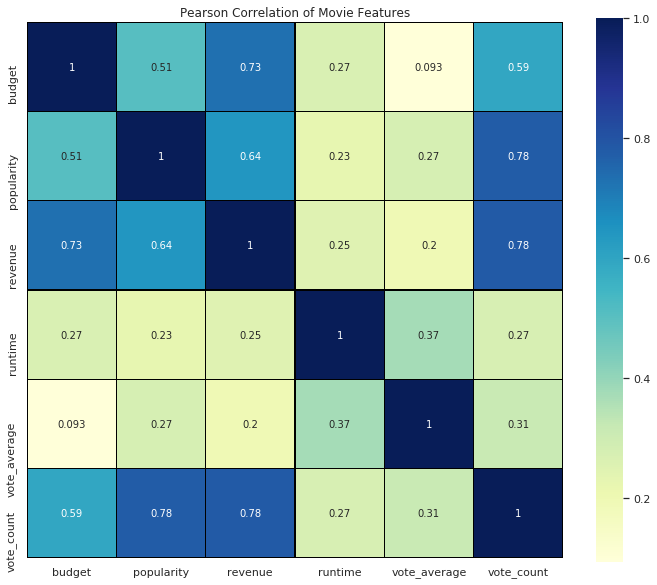

In [9]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movies_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

<h3>Analyze genres: <h3>

In [10]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

credits = load_tmdb_credits("dataset/tmdb_5000_credits.csv")
movies = load_tmdb_movies("dataset/tmdb_5000_movies.csv")

del credits['title']
df = pd.concat([movies, credits], axis=1)

df['genres'] = df['genres'].apply(pipe_flatten_names)

liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

df_reduced = df[['title','vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

for genre in liste_genres:
    df_reduced[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
df_reduced[:5]

df_reduced.head()

,title,vote_average,release_date,runtime,budget,revenue,History,Foreign,Adventure,Science Fiction,...,Mystery,Crime,Fantasy,Family,Western,Romance,War,Horror,Comedy,Documentary
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


We get an easy to work dataframe for the movie generes. Lets look at the distribution of the genres. 

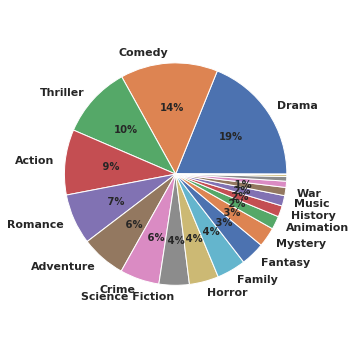

In [11]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5,5))
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, df_reduced[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()

We note that the number of different values of the 'genres' feature is quite small. Then we could use this features as a categorical feature. We could apply a 1 to n mapping.

<h2>  </h2>

Here we define some usefull function to preprocess the data.
We start with the root mean square error score.

<h2> Preprocessing </h2>

In the first step, we define the mean square error score. Then, we start with some preprocessing of the data to include feature of type dictionary. For example, we have implemented some function to convert and include information about the production countries, the production companies, the cast, the crew and the genres information for each movie.

In [12]:
from sklearn.cluster import KMeans

def convertGenres(movies_train, movies_test):
    liste_genres = set()
    for s in movies_train['genres'].str.split('|'):
        liste_genres = set().union(s, liste_genres)
    liste_genres = list(liste_genres)

    for genre in liste_genres:
        if genre != '':
            movies_train[genre] = movies_train['genres'].str.contains(genre).apply(lambda x: 1 if x else 0)
            movies_test[genre] = movies_test['genres'].str.contains(genre).apply(lambda x: 1 if x else 0)

    return movies_train, movies_test


def convertRuntime(movies):
    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['runtime']])
    movies['runtime'] = X2

    movies['runtime'] = pd.cut(movies['runtime'], [0, 75, movies['runtime'].describe()['max']], labels=['low', 'high'])

    for length in ["low", "high"]:
        movies[length] = movies['runtime'].str.contains(length).apply(lambda x: 1 if x else 0)

    return movies


def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    df['genres'] = df['genres'].apply(pipe_flatten_names)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def pipe_flatten_names(keywords):
    keys = [x['name'] for x in keywords]
    return '|'.join([x['name'] for x in keywords])


def insertCast(movies, meta):
    meta = meta.drop(['genres', 'budget'], axis=1)

    meta['movie_title'] = meta['movie_title'].apply(lambda x: x.strip())
    movies['title'] = movies['title'].apply(lambda x: x.strip())

    meta = meta[['movie_title', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                 'director_facebook_likes', 'movie_facebook_likes', 'cast_total_facebook_likes']]
    movies = pd.merge(movies, meta.drop_duplicates(subset=['movie_title']), how='left', left_on=['title'],
                      right_on=['movie_title'])

    movies = movies.drop(['movie_title'], axis=1)

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['actor_1_facebook_likes']])
    movies['actor_1_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['actor_2_facebook_likes']])
    movies['actor_2_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['actor_3_facebook_likes']])
    movies['actor_3_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['director_facebook_likes']])
    movies['director_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['movie_facebook_likes']])
    movies['movie_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['cast_total_facebook_likes']])
    movies['cast_total_facebook_likes'] = X2

    return movies


def castClustering(meta, movies_train, movies_test):
    meta = meta.drop(['genres', 'budget'], axis=1)

    directorDict = dict()
    actorsDict = dict()
    for index, row in meta.iterrows():
        directorDict[row['director_name']] = row['director_facebook_likes']
        actorsDict[row['actor_1_name']] = [row['actor_1_facebook_likes'], 0, 0]
        actorsDict[row['actor_2_name']] = [row['actor_2_facebook_likes'], 0, 0]
        actorsDict[row['actor_2_name']] = [row['actor_3_facebook_likes'], 0, 0]

    keys = actorsDict.keys()
    for index, row in movies_train.iterrows():
        actors = [x['name'] for x in row['cast']]
        for actor in actors:
            if actor in keys:
                actorsDict[actor][1] += row['popularity']
                actorsDict[actor][2] += 1

    df = pd.DataFrame.from_dict(actorsDict, orient='index')
    df.columns = ['facebook_likes', 'popularity', 'movies_number']
    df = df.fillna(0)

    df_min = df.min()
    df_max = df.max()
    df -= df_min
    df /= df_max

    # Convert DataFrame to matrix
    mat = df.values
    # Using sklearn
    km = KMeans(n_clusters=3)
    km.fit(mat)
    # Get cluster assignment labels
    labels = km.labels_
    # Format results as a DataFrame
    results = pd.DataFrame([df.index, labels]).T
    results.columns = ['actor', 'cluster']

    cluster_0 = results.loc[results['cluster'] == 0]['actor'].values
    cluster_1 = results.loc[results['cluster'] == 1]['actor'].values
    cluster_2 = results.loc[results['cluster'] == 2]['actor'].values

    movies_train['actor_0'] = 0
    movies_train['actor_1'] = 0
    movies_train['actor_2'] = 0

    for index, row in movies_train.iterrows():
        actors = [x['name'] for x in row['cast']]
        for actor in actors:
            if actor in cluster_0:
                movies_train.loc[index, 'actor_0'] = 1
                continue
            if actor in cluster_1:
                movies_train.loc[index, 'actor_1'] = 1
                continue
            if actor in cluster_2:
                movies_train.loc[index, 'actor_2'] = 1

    movies_test['actor_0'] = 0
    movies_test['actor_1'] = 0
    movies_test['actor_2'] = 0

    for index, row in movies_test.iterrows():
        actors = [x['name'] for x in row['cast']]
        for actor in actors:
            if actor in cluster_0:
                movies_test.loc[index, 'actor_0'] = 1
                continue
            if actor in cluster_1:
                movies_test.loc[index, 'actor_1'] = 1
                continue
            if actor in cluster_2:
                movies_test.loc[index, 'actor_2'] = 1

    return movies_train, movies_test

def includeProductionCompanies(movies_train, movies_test):
    # Learn the company score from the training test
    companiesList = dict()
    for index, row in movies_train.iterrows():
        companies = movies_train.loc[index, 'production_companies']
        for c in companies:
            if c['name'] in companiesList.keys():
                companiesList[c['name']][0] += movies_train.loc[index, 'popularity']
                companiesList[c['name']][1] += 1
            else:
                companiesList[c['name']] = [movies_train.loc[index, 'popularity'], 1]

    # Compute mean
    for e in companiesList.keys():
        companiesList[e] = companiesList[e][0] / companiesList[e][1]

    movies_train = movies_train.copy()
    movies_test = movies_test.copy()

    movies_train.loc[:, 'companies_popularity'] = 0
    movies_test.loc[:, 'companies_popularity'] = 0

    # Apply the company score to the training set
    for index, row in movies_train.iterrows():
        companies = movies_train.loc[index, 'production_companies']
        names = [c['name'] for c in companies]
        for company in names:
            if companiesList[company] > movies_train.loc[index, 'companies_popularity']:
                movies_train.loc[index, 'companies_popularity'] = companiesList[company]

    # Apply the company score to the test set
    for index, row in movies_test.iterrows():
        companies = movies_test.loc[index, 'production_companies']
        names = [c['name'] for c in companies]
        for company in names:
            if company in companiesList:
                if companiesList[company] > movies_test.loc[index, 'companies_popularity']:
                    movies_test.loc[index, 'companies_popularity'] = companiesList[company]

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies_test[['companies_popularity']])
    movies_test['companies_popularity'] = X2

    return movies_train, movies_test

def includeProductionCountries(movies_train, movies_test):
    array = []
    for index, row in movies_train.iterrows():
        if len(row['production_countries']) != 0:
            h = row['production_countries'][0]['iso_3166_1']
            movies_train.at[index, 'production_countries'] = h
            if h not in array:
                array.append(h)

    for c in array:
        movies_train[c] = movies_train['production_countries'].str.contains(c).apply(lambda x: 1 if x else 0)
        movies_test[c] = movies_test['production_countries'].str.contains(c).apply(lambda x: 1 if x else 0)

    return movies_train, movies_test

def preProcess(movies_train, movies_test, meta):
    movies_train = movies_train.copy()
    movies_test = movies_test.copy()
    movies_train, movies_test = convertGenres(movies_train, movies_test)

    movies_train, movies_test = includeProductionCompanies(movies_train, movies_test)
    movies_train, movies_test = includeProductionCountries(movies_train, movies_test)

    movies_train, movies_test = castClustering(meta, movies_train, movies_test)
    movies_train = insertCast(movies_train, meta)
    movies_test = insertCast(movies_test, meta)

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies_train[['runtime']])
    movies_train['runtime'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies_test[['runtime']])
    movies_test['runtime'] = X2

    my_imputer = SimpleImputer(missing_values=0)
    X2 = my_imputer.fit_transform(movies_train[['budget']])
    movies_train['budget'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies_test[['budget']])
    movies_test['budget'] = X2

    return movies_train, movies_test

We analyzed the clustering with the Elbow method and looging at the silhouette score

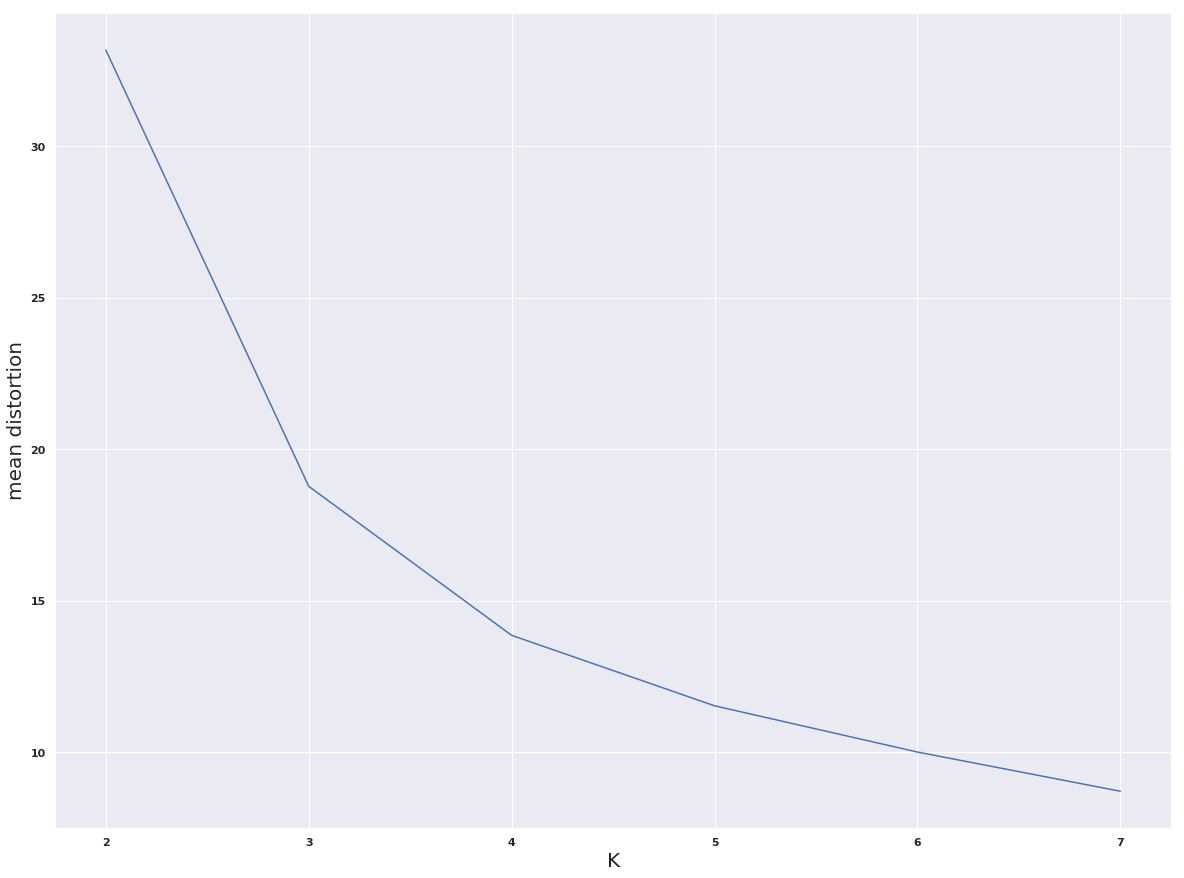

In [13]:
credits = load_tmdb_credits("dataset/tmdb_5000_credits.csv")
movies = load_tmdb_movies("dataset/tmdb_5000_movies.csv")
meta = pd.read_csv("dataset/movie_metadata.csv")
movies = pd.concat([movies, credits], axis=1)

meta = meta.drop(['genres', 'budget'], axis=1)

directorDict = dict()
actorsDict = dict()
for index, row in meta.iterrows():
    directorDict[row['director_name']] = row['director_facebook_likes']
    actorsDict[row['actor_1_name']] = [row['actor_1_facebook_likes'], 0, 0]
    actorsDict[row['actor_2_name']] = [row['actor_2_facebook_likes'], 0, 0]
    actorsDict[row['actor_2_name']] = [row['actor_3_facebook_likes'], 0, 0]

keys = actorsDict.keys()
for index, row in movies.iterrows():
    actors = [x['name'] for x in row['cast']]
    for actor in actors:
        if actor in keys:
            actorsDict[actor][1] += row['popularity']
            actorsDict[actor][2] += 1

df = pd.DataFrame.from_dict(actorsDict, orient='index')
df.columns = ['facebook_likes', 'popularity', 'movies_number']
df = df.fillna(0)

df_min = df.min()
df_max = df.max()
df -= df_min
df /= df_max

# Convert DataFrame to matrix
mat = df.values
distortion = []
k_ranges = range(2, 8)
for k in k_ranges:
    km = KMeans(n_clusters=k)
    km.fit(mat)
    distortion.append(km.inertia_)

plt.rcParams["figure.figsize"] = (20,15)
plt.plot(k_ranges, distortion)
plt.grid(True)
plt.xlabel("K", size=20)
plt.ylabel("mean distortion", size=20)
plt.show()

We can obsterve that after k=4 the distortion decrease slower. However we do not obsever a meaningfull improvement in the model prediction compared to k=3. 
Here we define the root mean square error score:

In [14]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

<h2> Part 2: Neural Network <h2>

We start with some preprocessing. As first step, we consider just numerical attributes. Then, we start adding more information (i.e., including genres, production companies, actors, cast...)

In [15]:
credits = load_tmdb_credits("dataset/tmdb_5000_credits.csv")
movies = load_tmdb_movies("dataset/tmdb_5000_movies.csv")
meta = pd.read_csv("dataset/movie_metadata.csv")
del credits['title']
movies = pd.concat([movies, credits], axis=1)

y = movies['popularity']
x_train, x_test, y_train, y_test = train_test_split(
    movies, y, test_size=0.30, random_state=1234)

x_train, x_test = preProcess(x_train, x_test, meta)

# Remove all nominal features
x_train = x_train.drop(
    ["genres", "homepage", "id", "keywords", "original_language", "original_title", "overview", "production_companies",
     "production_countries", "spoken_languages", "status", "tagline", "title", "release_date", "popularity", "cast", "crew", "movie_id"], axis=1)

x_test = x_test.drop(
    ["genres", "homepage", "id", "keywords", "original_language", "original_title", "overview", "production_companies",
     "production_countries", "spoken_languages", "status", "tagline", "title", "release_date", "popularity", "cast", "crew", "movie_id"], axis=1)

# Scale train and test set between 0 and 1 using the max and min values for each attribute the values for each
# attribute are retrieved form the training set and these values will be used on the test set too (e.g. we do not use
# the max and min value that the attributes of the test set will have, but we will use the ones from the training)
xmins = x_train.min()
xmaxs = x_train.max()
ymins = y_train.min()
ymaxs = y_train.max()
x_train -= xmins
x_train /= xmaxs
x_test -= xmins
x_test /= xmaxs
y_train -= ymins
y_train /= ymaxs
y_test -= ymins
y_test /= ymaxs

We try different configuration for the NN, choosing the best one.

In [16]:
import tensorflow as tf
tf.set_random_seed(12345)

best_mse = 100
best_mae = 100
best_model = ""
best_nodes = 1

# Train using 3 neurons in the hidden layer
for num_nodes in range(2, 26):

    MLP = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='sigmoid', input_shape=(x_train.shape[1],)),
        # tf.keras.layers.Dense(3, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    MLP.compile(optimizer="adadelta", loss="mse", metrics=['mae'])
    MLP.fit(x_train, y_train, epochs=10)

    mse, mae = MLP.evaluate(x_test, y_test)
    print("Error on the test set for " + str(num_nodes) + " nodes is: ", [mse, mae])

    if mse < best_mse:
        best_nodes = num_nodes
        best_mae = mae
        best_mse = mse
        best_model = MLP

print("The best loss is for " + str(best_nodes) + " nodes with MSE: " + str(best_mse) + ", MAE: " + str(best_mae))


Epoch 1/10
3362/3362 [==============================] - 0s 46us/step - loss: 0.7269 - mean_absolute_error: 0.8244
Epoch 2/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.1744 - mean_absolute_error: 0.3944
Epoch 3/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0414 - mean_absolute_error: 0.1790
Epoch 4/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0105 - mean_absolute_error: 0.0790
Epoch 5/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0063 - mean_absolute_error: 0.0584
Epoch 6/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0046 - mean_absolute_error: 0.0486
Epoch 7/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0035 - mean_absolute_error: 0.0413
Epoch 8/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0028 - mean_absolute_error: 0.0361
Epoch 9/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0024 - me

3362/3362 [==============================] - 0s 18us/step - loss: 0.0053 - mean_absolute_error: 0.0527
Epoch 6/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0029 - mean_absolute_error: 0.0364
Epoch 7/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0019 - mean_absolute_error: 0.0274
Epoch 8/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0015 - mean_absolute_error: 0.0221
Epoch 9/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0012 - mean_absolute_error: 0.0192
Epoch 10/10
1441/1441 [==============================] - 0s 56us/step
Error on the test set for 8 nodes is:  [0.0011025986638012078, 0.023361473776643098]
Epoch 1/10
3362/3362 [==============================] - 0s 80us/step - loss: 0.0331 - mean_absolute_error: 0.1365
Epoch 2/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0048 - mean_absolute_error: 0.0531
Epoch 3/10
3362/3362 [==============================] - 0s

3362/3362 [==============================] - 0s 19us/step - loss: 7.7210e-04 - mean_absolute_error: 0.0127
Epoch 9/10
3362/3362 [==============================] - 0s 18us/step - loss: 7.3669e-04 - mean_absolute_error: 0.0126
Epoch 10/10
1441/1441 [==============================] - 0s 101us/step
Error on the test set for 14 nodes is:  [0.00038660899994508375, 0.012724955529388167]
Epoch 1/10
3362/3362 [==============================] - 0s 129us/step - loss: 0.0939 - mean_absolute_error: 0.2257
Epoch 2/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0063 - mean_absolute_error: 0.0604
Epoch 3/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0027 - mean_absolute_error: 0.0375
Epoch 4/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0013 - mean_absolute_error: 0.0230
Epoch 5/10
3362/3362 [==============================] - 0s 18us/step - loss: 9.3426e-04 - mean_absolute_error: 0.0169
Epoch 6/10
3362/3362 [====================

1441/1441 [==============================] - 0s 155us/step
Error on the test set for 20 nodes is:  [0.0007174476496357833, 0.019727389359850588]
Epoch 1/10
3362/3362 [==============================] - 1s 179us/step - loss: 0.0478 - mean_absolute_error: 0.1444
Epoch 2/10
3362/3362 [==============================] - 0s 20us/step - loss: 0.0028 - mean_absolute_error: 0.0381
Epoch 3/10
3362/3362 [==============================] - 0s 22us/step - loss: 0.0013 - mean_absolute_error: 0.0229
Epoch 4/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0010 - mean_absolute_error: 0.0177
Epoch 5/10
3362/3362 [==============================] - 0s 19us/step - loss: 9.4765e-04 - mean_absolute_error: 0.0171
Epoch 6/10
3362/3362 [==============================] - 0s 20us/step - loss: 8.6323e-04 - mean_absolute_error: 0.0158
Epoch 7/10
3362/3362 [==============================] - 0s 19us/step - loss: 8.3907e-04 - mean_absolute_error: 0.0149
Epoch 8/10
3362/3362 [======================

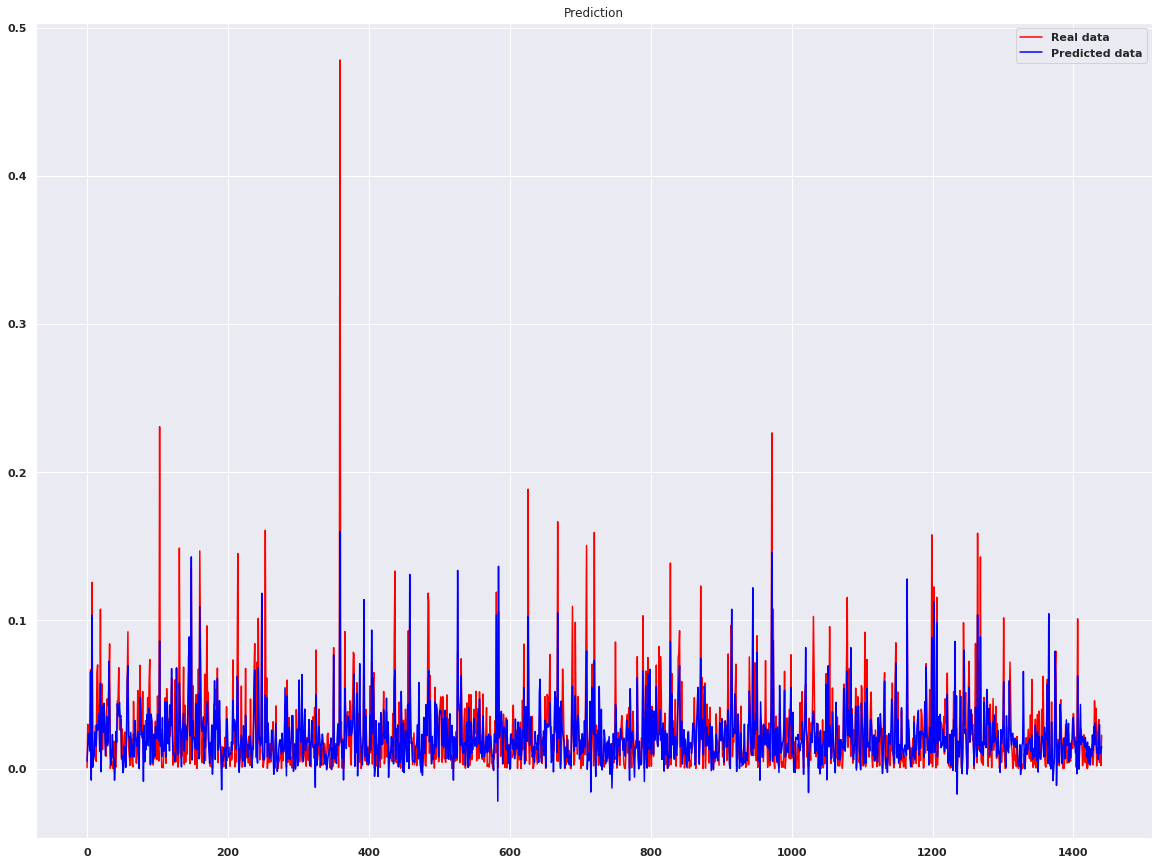

In [17]:
y_pred = best_model.predict(x_test)

plt.plot(np.arange(len(y_test)), y_test, color='red', label = 'Real data')
plt.plot(np.arange(len(y_test)), y_pred, color='blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()

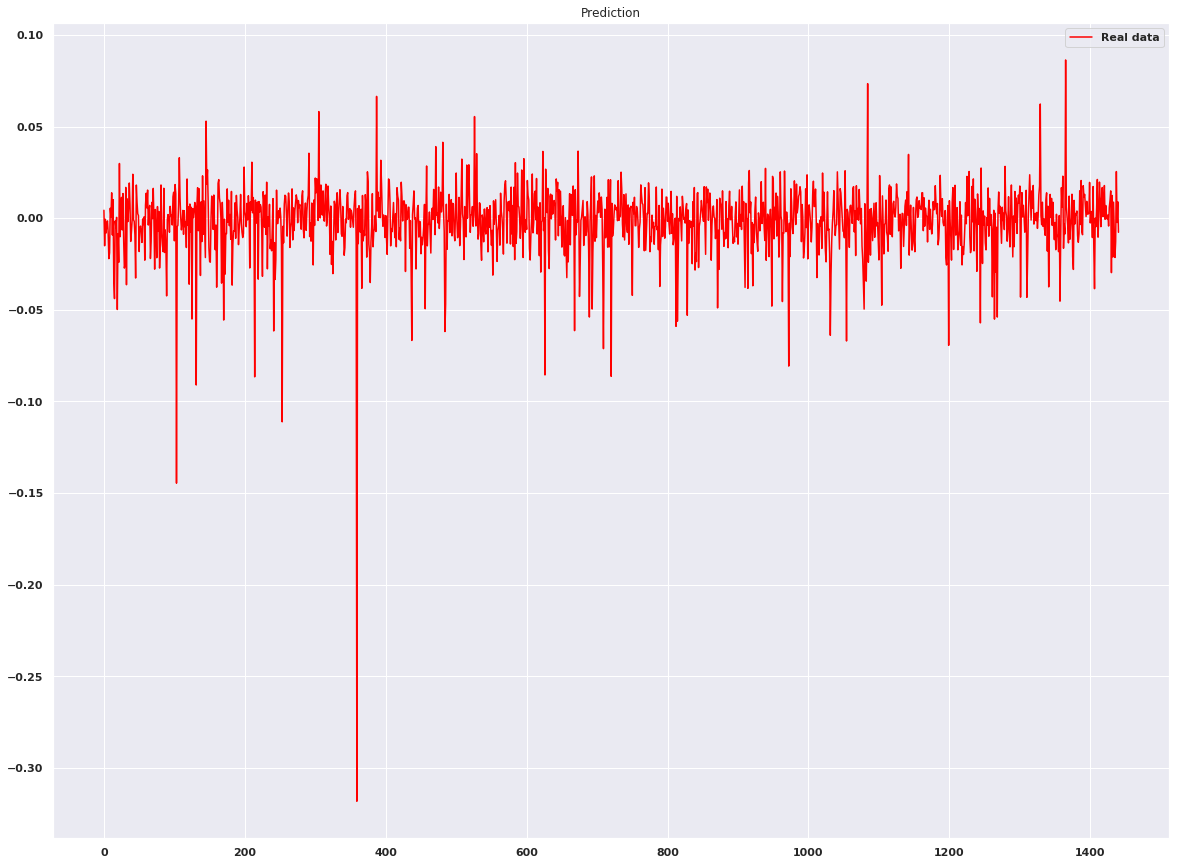

In [18]:
y_pred = np.concatenate(y_pred, axis=0)
plt.plot(np.arange(len(y_test)), y_pred - y_test.values, color='red', label='Real data')
plt.title('Prediction')
plt.legend()
plt.show()

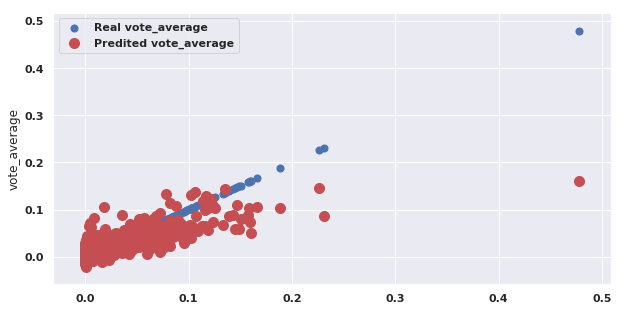

In [19]:
f = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test, s=50,label="Real vote_average");
plt.scatter(y_test, y_pred,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [20]:
print("Root mean squared error: %.6f"
      % rmse(y_test, y_pred))
print("Mean absolute error: %.6f"
      % mean_absolute_error(y_test, y_pred))

Root mean squared error: 0.019213
Mean absolute error: 0.011982


The resulting prediction in pretty accurate. We verified that the 'vote_count' feature is high correlated with the popularity. Including other features do not add any information. Testing the model with information by the cast, the crew, or the production companies do not change significantly the prediction.
We will try to discard the features not available in a real prediction  scenario as the 'vote_count', 'vote_mean' and 'revenue' attributes. We include information from the movie_dataset dataset to extrapolate information about actors. In particular, it includes data by facebook for each actor and director that appears in a movie.

In [21]:
credits = load_tmdb_credits("dataset/tmdb_5000_credits.csv")
movies = load_tmdb_movies("dataset/tmdb_5000_movies.csv")
meta = pd.read_csv("dataset/movie_metadata.csv")
del credits['title']
movies = pd.concat([movies, credits], axis=1)

y = movies['popularity']
x_train, x_test, y_train, y_test = train_test_split(
    movies, y, test_size=0.30, random_state=1234)

x_train, x_test = preProcess(x_train, x_test, meta)

# Remove all nominal features
x_train = x_train.drop(
    ["genres", "homepage", "id", "keywords", "original_language", "original_title", "overview", "production_companies",
     "production_countries", "spoken_languages", "status", "tagline", "title", "release_date", "popularity", "cast", "crew", "movie_id",
    'vote_count', 'vote_average', 'revenue'], axis=1)

x_test = x_test.drop(
    ["genres", "homepage", "id", "keywords", "original_language", "original_title", "overview", "production_companies",
     "production_countries", "spoken_languages", "status", "tagline", "title", "release_date", "popularity", "cast", "crew", "movie_id",
    'vote_count', 'vote_average', 'revenue'], axis=1)

# Scale train and test set between 0 and 1 using the max and min values for each attribute the values for each
# attribute are retrieved form the training set and these values will be used on the test set too (e.g. we do not use
# the max and min value that the attributes of the test set will have, but we will use the ones from the training)
xmins = x_train.min()
xmaxs = x_train.max()
ymins = y_train.min()
ymaxs = y_train.max()
x_train -= xmins
x_train /= xmaxs
x_test -= xmins
x_test /= xmaxs
y_train -= ymins
y_train /= ymaxs
y_test -= ymins
y_test /= ymaxs

In [22]:
import tensorflow as tf
tf.set_random_seed(12345)

best_mse = 100
best_mae = 100
best_model = ""
best_nodes = 1

# Train using 3 neurons in the hidden layer
for num_nodes in range(2, 26):

    MLP = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='sigmoid', input_shape=(x_train.shape[1],)),
        # tf.keras.layers.Dense(3, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    MLP.compile(optimizer="adadelta", loss="mse", metrics=['mae'])
    MLP.fit(x_train, y_train, epochs=10)

    mse, mae = MLP.evaluate(x_test, y_test)
    print("Error on the test set for " + str(num_nodes) + " nodes is: ", [mse, mae])

    if mse < best_mse:
        best_nodes = num_nodes
        best_mae = mae
        best_mse = mse
        best_model = MLP

print("The best loss is for " + str(best_nodes) + " nodes with MSE: " + str(best_mse) + ", MAE: " + str(best_mae))


Epoch 1/10
3362/3362 [==============================] - 1s 236us/step - loss: 0.0486 - mean_absolute_error: 0.1811
Epoch 2/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0085 - mean_absolute_error: 0.0706
Epoch 3/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0054 - mean_absolute_error: 0.0547
Epoch 4/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0034 - mean_absolute_error: 0.0413
Epoch 5/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0023 - mean_absolute_error: 0.0317
Epoch 6/10
3362/3362 [==============================] - 0s 20us/step - loss: 0.0018 - mean_absolute_error: 0.0261
Epoch 7/10
3362/3362 [==============================] - 0s 20us/step - loss: 0.0016 - mean_absolute_error: 0.0227
Epoch 8/10
3362/3362 [==============================] - 0s 21us/step - loss: 0.0014 - mean_absolute_error: 0.0207
Epoch 9/10
3362/3362 [==============================] - 0s 21us/step - loss: 0.0013 - m

3362/3362 [==============================] - 0s 24us/step - loss: 0.0015 - mean_absolute_error: 0.0235
Epoch 6/10
3362/3362 [==============================] - 0s 29us/step - loss: 0.0013 - mean_absolute_error: 0.0199
Epoch 7/10
3362/3362 [==============================] - 0s 22us/step - loss: 0.0012 - mean_absolute_error: 0.0182
Epoch 8/10
3362/3362 [==============================] - 0s 23us/step - loss: 0.0011 - mean_absolute_error: 0.0172
Epoch 9/10
3362/3362 [==============================] - 0s 24us/step - loss: 0.0011 - mean_absolute_error: 0.0167
Epoch 10/10
1441/1441 [==============================] - 0s 309us/step
Error on the test set for 8 nodes is:  [0.0011438443188120577, 0.02364398137582912]
Epoch 1/10
3362/3362 [==============================] - 1s 345us/step - loss: 0.0760 - mean_absolute_error: 0.2224
Epoch 2/10
3362/3362 [==============================] - 0s 20us/step - loss: 0.0050 - mean_absolute_error: 0.0512
Epoch 3/10
3362/3362 [==============================] - 0

Epoch 9/10
3362/3362 [==============================] - 0s 21us/step - loss: 8.5378e-04 - mean_absolute_error: 0.0150
Epoch 10/10
1441/1441 [==============================] - 1s 395us/step
Error on the test set for 14 nodes is:  [0.0007390879569441486, 0.018937555042862642]
Epoch 1/10
3362/3362 [==============================] - 1s 407us/step - loss: 0.0186 - mean_absolute_error: 0.0952
Epoch 2/10
3362/3362 [==============================] - 0s 21us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 3/10
3362/3362 [==============================] - 0s 23us/step - loss: 0.0019 - mean_absolute_error: 0.0268
Epoch 4/10
3362/3362 [==============================] - 0s 21us/step - loss: 0.0015 - mean_absolute_error: 0.0221
Epoch 5/10
3362/3362 [==============================] - 0s 22us/step - loss: 0.0013 - mean_absolute_error: 0.0198
Epoch 6/10
3362/3362 [==============================] - 0s 22us/step - loss: 0.0012 - mean_absolute_error: 0.0190
Epoch 7/10
3362/3362 [==================

3362/3362 [==============================] - 2s 510us/step - loss: 0.0029 - mean_absolute_error: 0.0367
Epoch 2/10
3362/3362 [==============================] - 0s 23us/step - loss: 0.0015 - mean_absolute_error: 0.0231
Epoch 3/10
3362/3362 [==============================] - 0s 23us/step - loss: 0.0013 - mean_absolute_error: 0.0201
Epoch 4/10
3362/3362 [==============================] - 0s 24us/step - loss: 0.0012 - mean_absolute_error: 0.0193
Epoch 5/10
3362/3362 [==============================] - 0s 23us/step - loss: 0.0012 - mean_absolute_error: 0.0182
Epoch 6/10
3362/3362 [==============================] - 0s 24us/step - loss: 0.0011 - mean_absolute_error: 0.0177
Epoch 7/10
3362/3362 [==============================] - 0s 24us/step - loss: 0.0011 - mean_absolute_error: 0.0176
Epoch 8/10
3362/3362 [==============================] - 0s 23us/step - loss: 0.0010 - mean_absolute_error: 0.0166
Epoch 9/10
3362/3362 [==============================] - 0s 23us/step - loss: 9.7982e-04 - mean_abs

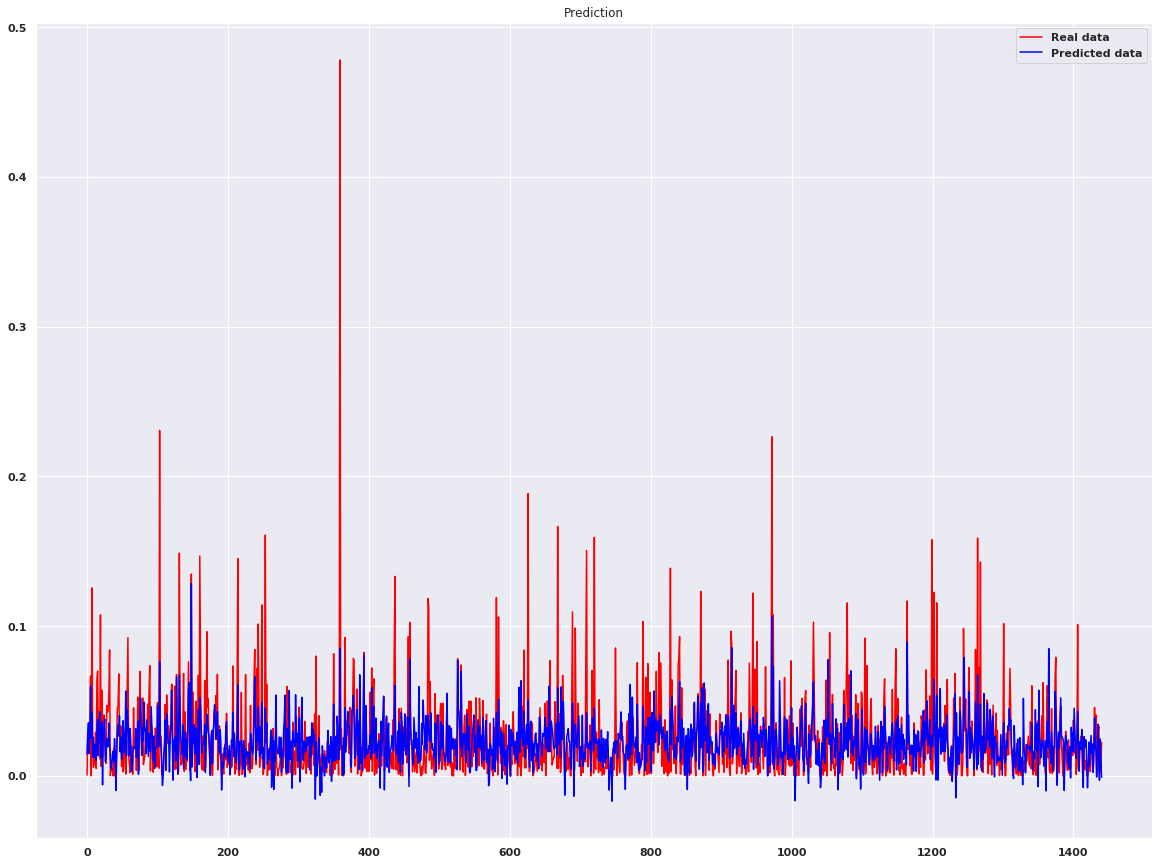

In [23]:
y_pred = best_model.predict(x_test)
plt.plot(np.arange(len(y_test)), y_test, color='red', label = 'Real data')
plt.plot(np.arange(len(y_test)), y_pred, color='blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()

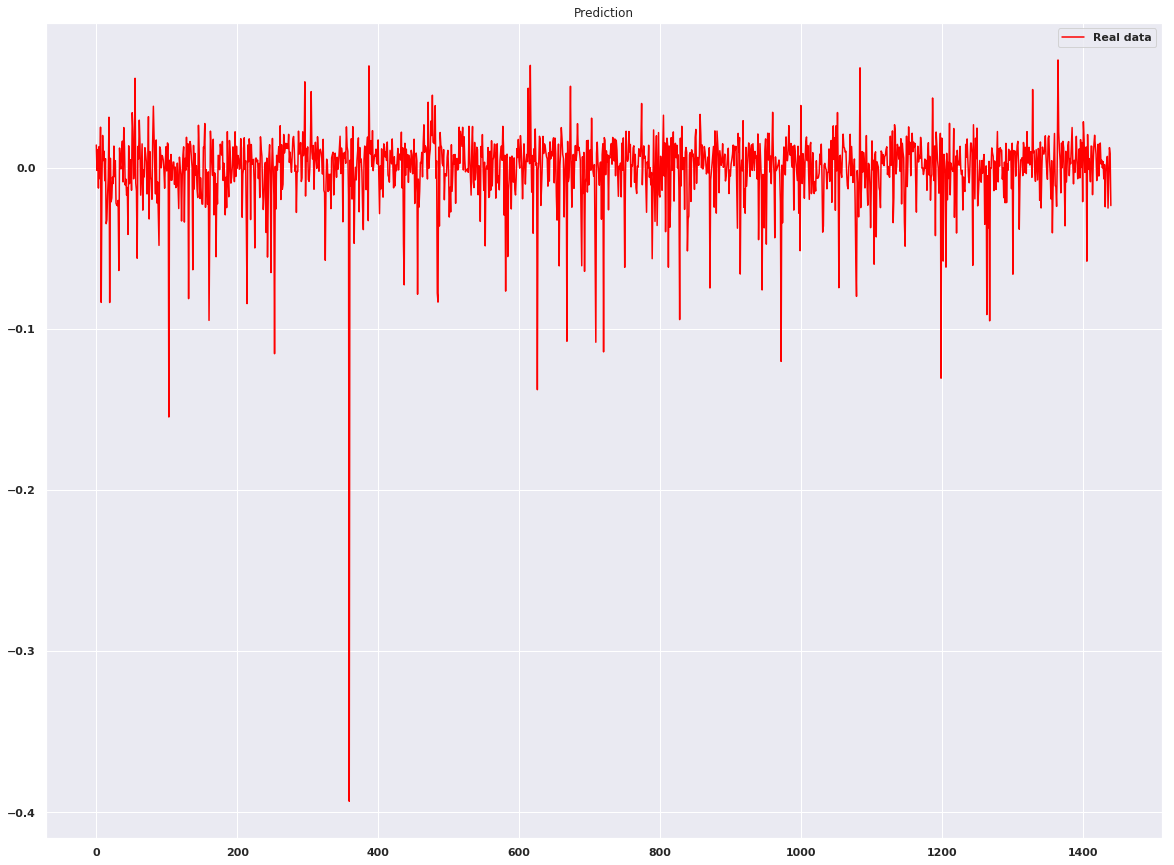

In [24]:
y_pred = np.concatenate(y_pred, axis=0)
plt.plot(np.arange(len(y_test)), y_pred - y_test.values, color='red', label='Real data')
plt.title('Prediction')
plt.legend()
plt.show()

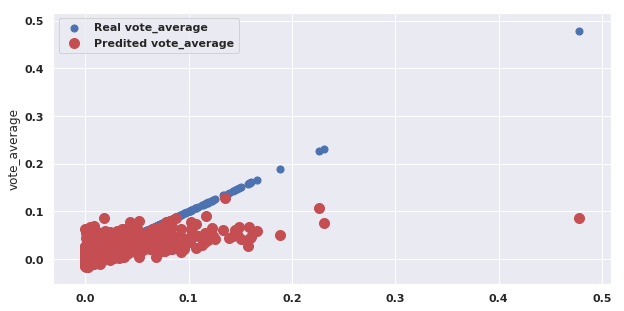

In [25]:
f = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test, s=50,label="Real vote_average");
plt.scatter(y_test, y_pred,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [26]:
print("Root mean squared error: %.6f"
      % rmse(y_test, y_pred))
print("Mean absolute error: %.6f"
      % mean_absolute_error(y_test, y_pred))

Root mean squared error: 0.023744
Mean absolute error: 0.014370
